In [3]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
wine_quality <- read.csv('winequality-red.csv', sep = ";") |>
    select(total.sulfur.dioxide, quality) |>
    group_by(quality) |>
    summarize(mean = mean(total.sulfur.dioxide))
wine_quality

quality,mean
<int>,<dbl>
3,24.90000
4,36.24528
5,56.51395
6,40.86991
7,35.02010
8,33.44444


Introduction
- Why sulfur dioxide
- Effect of ...
- Research Question (why or why not)
- Reason and supoortie articles
- quality rating
- Database, resource, reliability, author
- hypothesis testing (null, alternative, signficance level)
- bootstrap + confidence interval

research question:
Is there a significant difference in total sulphur dioxide levels between different quality rating? 

methods:
- bootstrap
- mean -- group by different samples
- multiple hypothesis test 
- confidence interval
- type 1 type 2 error analysis

In [16]:
data <- read.csv('winequality-red.csv', sep = ";")

head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


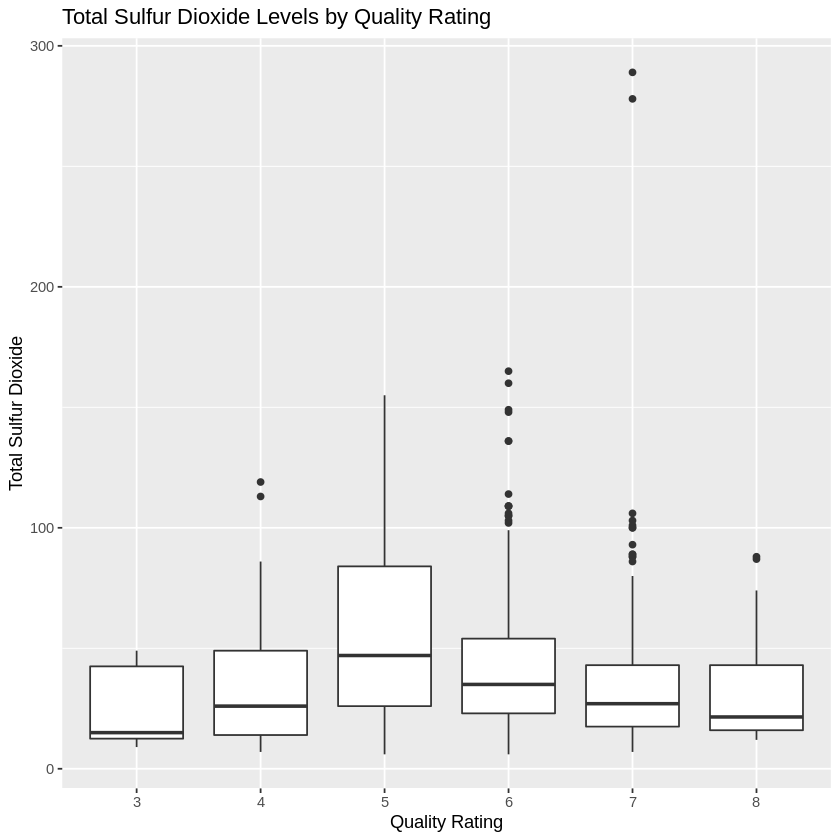

In [21]:
ggplot(data, aes(x = factor(quality), y = total.sulfur.dioxide)) +
  geom_boxplot() +
  labs(x = "Quality Rating", y = "Total Sulfur Dioxide") +
  ggtitle("Total Sulfur Dioxide Levels by Quality Rating")

In [24]:
parameter_estimates <- data %>%
  group_by(quality) %>%
  summarise(mean_total_sulfur_dioxide = mean(total.sulfur.dioxide))
print(parameter_estimates)

# A tibble: 6 × 2
  quality mean_total_sulfur_dioxide
    <int>                     <dbl>
1       3                      24.9
2       4                      36.2
3       5                      56.5
4       6                      40.9
5       7                      35.0
6       8                      33.4
